In [1]:
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from datetime import datetime
from pandas.stats.moments import ewma
from scipy.fftpack import dct, idct
%matplotlib inline

In [7]:
data = pd.read_csv("smoothing_data1.csv")
data.head(5)

,ingestdate,qtyavail
0,20130809,15878000
1,20130809,15889370
2,20130809,15889370
3,20130809,15878000
4,20130809,15889370


In [8]:
data['ingestdatetime'] = data.apply(lambda row: datetime.strptime(str(row['ingestdate']), "%Y%m%d"), axis=1)

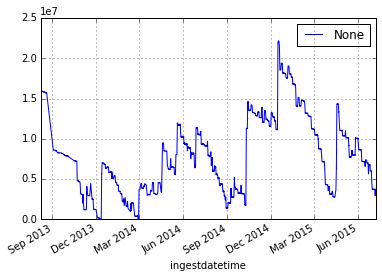

In [9]:
data.plot(x='ingestdatetime', y='qtyavail')

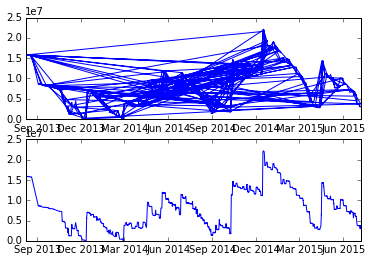

In [10]:
# I learned that you have to sort your data in order to use plot.plot
plt.figure(1)
plt.subplot(211)
plt.plot_date(x=data['ingestdatetime'], y=data['qtyavail'], fmt='-' )
data = data.sort(['ingestdate'], ascending=[1])
plt.subplot(212)
plt.plot_date(x=data['ingestdatetime'], y=data['qtyavail'], fmt='-' )
plt.show()

# Smoothing1: EWMA

In [11]:
def myfunc_buy_sale(ts_quantity):
    diffs = np.diff(ts_quantity)
    result_sale = abs(sum(filter(lambda x: x < 0, diffs)))
    result_buy = abs(sum(filter(lambda x: x > 0, diffs)))
    return (result_sale, result_buy)

Raw Data
Sold:140672986, Bought:128555888
After Smoothing
Sold:55054485.6658, Bought:43904257.6044


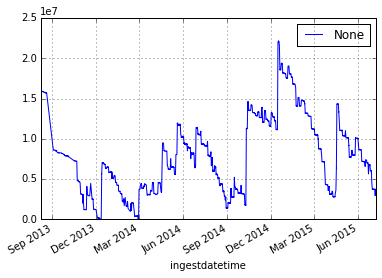

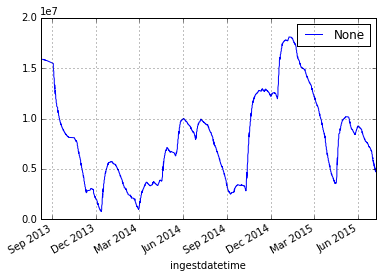

In [12]:
data['qtyavail_ewma'] = ewma(data['qtyavail'], span=50)
data.plot(x='ingestdatetime', y='qtyavail')
s, b = myfunc_buy_sale(data['qtyavail'])
print 'Raw Data'
print 'Sold:{0}, Bought:{1}'.format(s, b)

data.plot(x='ingestdatetime', y='qtyavail_ewma')
s, b = myfunc_buy_sale(data['qtyavail_ewma'])
print 'After Smoothing'
print 'Sold:{0}, Bought:{1}'.format(s, b)

# Smoothing2: DCT

20 Items
Sold:42088164.543, Bought:30315166.3773
15 Items
Sold:40508532.1084, Bought:28833387.9032


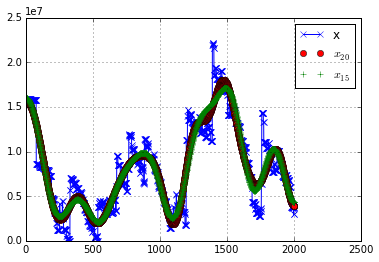

In [13]:
# http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html#example
N = len(data)
t = range(len(data))
x = [float(elem) for elem in data['qtyavail']]
y = dct(x, norm='ortho')
window = np.zeros(N)
window[:20] = 1
yr = idct(y*window, norm='ortho')
s, b = myfunc_buy_sale(yr)
print '20 Items'
print 'Sold:{0}, Bought:{1}'.format(s, b)
plt.plot(t, x, '-bx')
plt.plot(t, yr, 'ro')
window = np.zeros(N)
window[:15] = 1
yr = idct(y*window, norm='ortho')
plt.plot(t, yr, 'g+')
plt.legend(['x', '$x_{20}$', '$x_{15}$'])
plt.grid()
s, b = myfunc_buy_sale(yr)
print '15 Items'
print 'Sold:{0}, Bought:{1}'.format(s, b)

plt.show()